In [1]:
#Amy Nestingen
#DSC 550
#5/30/20
#Final Project
#Predict the annual usage of tube assemblies from Caterpillar Data

In [2]:
#Show all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#imports
import pandas as pd
import numpy as np
import yellowbrick
import os

In [4]:
#set working directory
os.chdir("\\Users\\nesti\\OneDrive\\Bellevue\\DSC 550\\DSC 550 Project")
os.getcwd()

'C:\\Users\\nesti\\OneDrive\\Bellevue\\DSC 550\\DSC 550 Project'

In [5]:
#Step 1:  Load data into a dataframe
train = "train_set.csv"
tube = "tube.csv"

#Convert to pandas data frame
df_train = pd.read_csv(train)
df_tube = pd.read_csv(tube)

#Add Cost Per Quantity to Train Data
df_train['unit_cost'] = df_train.apply(lambda row: row.cost/row.quantity, axis = 1) 

print(df_train.head())

  tube_assembly_id supplier quote_date  annual_usage  min_order_quantity  \
0         TA-00002   S-0066   7/7/2013             0                   0   
1         TA-00002   S-0066   7/7/2013             0                   0   
2         TA-00002   S-0066   7/7/2013             0                   0   
3         TA-00002   S-0066   7/7/2013             0                   0   
4         TA-00002   S-0066   7/7/2013             0                   0   

  bracket_pricing  quantity       cost usage_group  unit_cost  
0             Yes         1  21.905933     0 - 100  21.905933  
1             Yes         2  12.341214     0 - 100   6.170607  
2             Yes         5   6.601826     0 - 100   1.320365  
3             Yes        10   4.687770     0 - 100   0.468777  
4             Yes        25   3.541561     0 - 100   0.141662  


In [6]:
#Aggregate Train Data by ID and Quote Date

#Group Data
df_train_ag = df_train.groupby(
    ['tube_assembly_id', 'quote_date']
).agg(
    {
        # Find the max of the annual usage column
        'annual_usage': max,
        # find the median of the unit cost
        'unit_cost': 'median',
        # minimum, first, and number of unique dates
        #'date': [min, 'first', 'nunique']
    }
)

print(df_train_ag.head())

                             annual_usage  unit_cost
tube_assembly_id quote_date                         
TA-00002         7/7/2013               0   0.305220
TA-00004         7/7/2013               0   0.309894
TA-00005         9/1/2013               0   0.463435
TA-00012         8/11/2013              0   0.340997
TA-00013         7/21/1992             50  10.004284


In [7]:
#Keep only latest quote

#Sort Values by Quote Date
df_train_ag.sort_values("quote_date", ascending = False)
print(df_train_ag.head())

#Group Data
df_train_ag_2 = df_train_ag.groupby(
    ['tube_assembly_id']
).agg(
    {
        # Find the first of the annual usage column
        'annual_usage': 'first',
        # find the first unit cost
        'unit_cost': 'first'
    }
)

print(df_train_ag_2.head())

,,annual_usage,unit_cost
tube_assembly_id,quote_date,,
TA-18819,9/9/2013,200,6.095491
TA-12314,9/9/2013,16,10.531643
TA-13524,9/9/2009,1,2.292046
TA-13176,9/9/2008,1,247.263845
TA-12929,9/9/2008,226,8.134741
...,...,...,...
TA-03669,1/1/2004,30000,1.107260
TA-01386,1/1/2003,45,21.001764
TA-04056,1/1/2002,50,15.943980


                             annual_usage  unit_cost
tube_assembly_id quote_date                         
TA-00002         7/7/2013               0   0.305220
TA-00004         7/7/2013               0   0.309894
TA-00005         9/1/2013               0   0.463435
TA-00012         8/11/2013              0   0.340997
TA-00013         7/21/1992             50  10.004284
                  annual_usage  unit_cost
tube_assembly_id                         
TA-00002                     0   0.305220
TA-00004                     0   0.309894
TA-00005                     0   0.463435
TA-00012                     0   0.340997
TA-00013                    50  10.004284


In [34]:
#Add Usage Group

def f(row):
    if row['annual_usage'] < 500:
        val = '0-500'
    elif row['annual_usage'] < 1000:
        val = '500-1000'
    elif row['annual_usage'] < 5000:
        val = '1000-5000'   
    elif row['annual_usage'] < 10000:
        val = '5000-10000'
    else:
        val = 'Greater than 10,000'
    return val

df_train_ag_2['usage_group'] = df_train_ag_2.apply(f, axis=1)
df_train_ag_2


,annual_usage,unit_cost,usage_group
tube_assembly_id,,,
TA-00002,0,0.305220,0-500
TA-00004,0,0.309894,0-500
TA-00005,0,0.463435,0-500
TA-00012,0,0.340997,0-500
TA-00013,50,10.004284,0-500
...,...,...,...
TA-21190,869,0.079270,500-1000
TA-21191,752,6.131658,500-1000
TA-21195,1,0.063327,0-500


In [35]:
#Join Data

df_train_ag_2
print("The dimension of the table is: ", df_train_ag_2.shape)
data = pd.merge(df_train_ag_2, df_tube, how='left', on=['tube_assembly_id'])
data

,annual_usage,unit_cost,usage_group
tube_assembly_id,,,
TA-00002,0,0.305220,0-500
TA-00004,0,0.309894,0-500
TA-00005,0,0.463435,0-500
TA-00012,0,0.340997,0-500
TA-00013,50,10.004284,0-500
...,...,...,...
TA-21190,869,0.079270,500-1000
TA-21191,752,6.131658,500-1000
TA-21195,1,0.063327,0-500


The dimension of the table is:  (8855, 3)


,tube_assembly_id,annual_usage,unit_cost,usage_group,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,TA-00002,0,0.305220,0-500,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0
1,TA-00004,0,0.309894,0-500,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,TA-00005,0,0.463435,0-500,SP-0029,19.05,1.24,109.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0
3,TA-00012,0,0.340997,0-500,SP-0039,6.35,0.71,207.0,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,TA-00013,50,10.004284,0-500,SP-0028,38.10,1.65,106.0,3,76.20,N,N,N,N,NONE,NONE,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8850,TA-21190,869,0.079270,500-1000,SP-0035,15.88,1.65,77.0,5,31.75,N,N,N,N,EF-003,EF-018,0,0,0
8851,TA-21191,752,6.131658,500-1000,SP-0035,15.88,1.65,97.0,6,31.75,N,N,N,N,EF-003,EF-018,0,0,0
8852,TA-21195,1,0.063327,0-500,SP-0029,25.40,1.65,86.0,2,38.10,N,N,N,N,EF-003,EF-009,0,0,0
8853,TA-21196,422,18.214141,0-500,SP-0029,34.92,1.65,49.0,2,50.80,Y,Y,N,N,EF-003,EF-017,0,0,0


In [36]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (8855, 19)


In [37]:
#Step 3:  Look at the data
print(data.head(5))

  tube_assembly_id  annual_usage  unit_cost usage_group material_id  diameter  \
0         TA-00002             0   0.305220       0-500     SP-0019      6.35   
1         TA-00004             0   0.309894       0-500     SP-0019      6.35   
2         TA-00005             0   0.463435       0-500     SP-0029     19.05   
3         TA-00012             0   0.340997       0-500     SP-0039      6.35   
4         TA-00013            50  10.004284       0-500     SP-0028     38.10   

   wall  length  num_bends  bend_radius end_a_1x end_a_2x end_x_1x end_x_2x  \
0  0.71   137.0          8        19.05        N        N        N        N   
1  0.71   137.0          9        19.05        N        N        N        N   
2  1.24   109.0          4        50.80        N        N        N        N   
3  0.71   207.0          7        19.05        N        N        N        N   
4  1.65   106.0          3        76.20        N        N        N        N   

    end_a   end_x  num_boss  num_brack

In [12]:
#Step 4:  Describe the Data
print("Describe Data")
print(data.describe())

#Step 5: Summarize the Data
print("Summarized Data")
print(data.describe(include=['O']))

#There are missing values in the material ID
# There is a very large standard deviation (1590) in the annual usage. 

Describe Data
        annual_usage    unit_cost     diameter         wall       length  \
count    8855.000000  8855.000000  8855.000000  8855.000000  8855.000000   
mean      344.010277     9.209328    24.135999     1.494903    95.064623   
std      2877.190492    33.653820    27.066502     0.652347    63.055304   
min         0.000000     0.002916     3.180000     0.710000     0.000000   
25%         0.000000     0.362196     9.520000     0.890000    47.000000   
50%         5.000000     1.425805    15.880000     1.650000    83.000000   
75%        85.000000     6.841083    25.400000     1.650000   129.000000   
max    150000.000000  1000.000000   203.200000     7.900000  1333.000000   

         num_bends  bend_radius     num_boss  num_bracket        other  
count  8855.000000  8855.000000  8855.000000  8855.000000  8855.000000  
mean      3.697685    48.455189     0.045285     0.006776     0.026200  
std       2.300787   186.660380     0.260067     0.095997     0.230379  
min      

(array([8.732e+03, 6.000e+01, 2.200e+01, 2.000e+00, 8.000e+00, 5.000e+00,
        7.000e+00, 3.000e+00, 6.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([     0.,   3750.,   7500.,  11250.,  15000.,  18750.,  22500.,
         26250.,  30000.,  33750.,  37500.,  41250.,  45000.,  48750.,
         52500.,  56250.,  60000.,  63750.,  67500.,  71250.,  75000.,
         78750.,  82500.,  86250.,  90000.,  93750.,  97500., 101250.,
        105000., 108750., 112500., 116250., 120000., 123750., 127500.,
        131250., 135000., 138750., 142500., 146250., 150000.]),
 <a list of 40 Patch objects>)

Text(0.5, 0, 'annual_usage')

Text(0, 0.5, 'Counts')

(array([8.224e+03, 2.740e+02, 1.690e+02, 6.300e+01, 4.000e+01, 2.100e+01,
        1.200e+01, 1.400e+01, 7.000e+00, 6.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([2.91559789e-03, 2.50028427e+01, 5.00027698e+01, 7.50026969e+01,
        1.00002624e+02, 1.25002551e+02, 1.50002478e+02, 1.75002405e+02,
        2.00002332e+02, 2.25002260e+02, 2.50002187e+02, 2.75002114e+02,
        3.00002041e+02, 3.25001968e+02, 3.50001895e+02, 3.75001822e+02,
        4.00001749e+02, 4.25001676e+02, 4.50001604e+02, 4.75001531e+02,
        5.00001458e+02, 5.25001385e+02, 5.50001312e+02, 5.75001239e+02,
        6.00001166e+02, 6.25001093e+02, 6.50001020e+02, 6.75000948e+02

Text(0.5, 0, 'unit_cost')

Text(0, 0.5, 'Counts')

(array([1.668e+03, 2.703e+03, 1.033e+03, 9.620e+02, 8.950e+02, 1.350e+02,
        1.890e+02, 4.600e+01, 2.500e+01, 1.230e+02, 4.700e+01, 2.000e+00,
        3.220e+02, 1.900e+01, 1.330e+02, 2.000e+00, 0.000e+00, 1.850e+02,
        0.000e+00, 1.770e+02, 0.000e+00, 0.000e+00, 1.100e+01, 0.000e+00,
        1.060e+02, 0.000e+00, 0.000e+00, 1.200e+01, 0.000e+00, 5.500e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00]),
 array([  3.18  ,   8.1805,  13.181 ,  18.1815,  23.182 ,  28.1825,
         33.183 ,  38.1835,  43.184 ,  48.1845,  53.185 ,  58.1855,
         63.186 ,  68.1865,  73.187 ,  78.1875,  83.188 ,  88.1885,
         93.189 ,  98.1895, 103.19  , 108.1905, 113.191 , 118.1915,
        123.192 , 128.1925, 133.193 , 138.1935, 143.194 , 148.1945,
        153.195 , 158.1955, 163.196 , 168.1965, 173.197 , 178.1975,
        183.198 , 188.1985, 193.199 , 198.1995, 203.2   ]),
 <a list of 40 Patch objects>)

Text(0.5, 0, 'diameter')

Text(0, 0.5, 'Counts')

(array([9.660e+02, 1.608e+03, 1.114e+03, 0.000e+00, 0.000e+00, 3.982e+03,
        5.000e+00, 4.070e+02, 5.900e+01, 2.340e+02, 0.000e+00, 3.000e+00,
        3.000e+00, 3.860e+02, 1.200e+01, 1.500e+01, 0.000e+00, 2.000e+00,
        2.600e+01, 0.000e+00, 0.000e+00, 0.000e+00, 1.700e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.400e+01]),
 array([0.71   , 0.88975, 1.0695 , 1.24925, 1.429  , 1.60875, 1.7885 ,
        1.96825, 2.148  , 2.32775, 2.5075 , 2.68725, 2.867  , 3.04675,
        3.2265 , 3.40625, 3.586  , 3.76575, 3.9455 , 4.12525, 4.305  ,
        4.48475, 4.6645 , 4.84425, 5.024  , 5.20375, 5.3835 , 5.56325,
        5.743  , 5.92275, 6.1025 , 6.28225, 6.462  , 6.64175, 6.8215 ,
        7.00125, 7.181  , 7.36075, 7.5405 , 7.72025, 7.9    ]),
 <a list of 40 Patch objects>)

Text(0.5, 0, 'wall')

Text(0, 0.5, 'Counts')

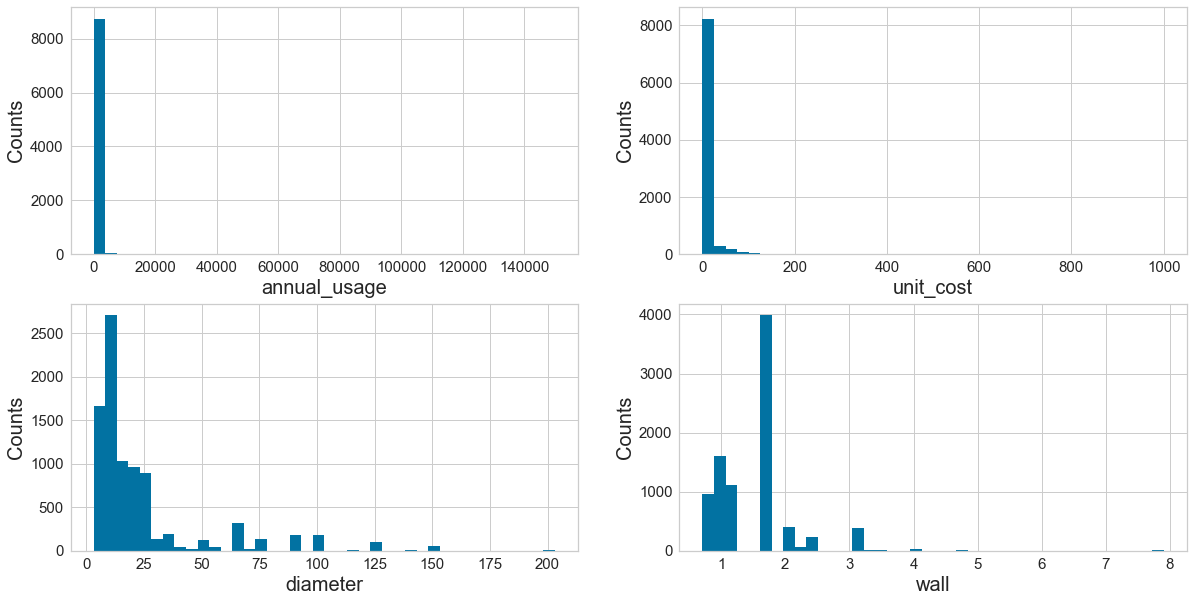

In [13]:
#Step 6: Histograms 1
import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['annual_usage', 'unit_cost', 'diameter', 'wall'] 

xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

(array([8.732e+03, 6.000e+01, 2.200e+01, 2.000e+00, 8.000e+00, 5.000e+00,
        7.000e+00, 3.000e+00, 6.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([     0.,   3750.,   7500.,  11250.,  15000.,  18750.,  22500.,
         26250.,  30000.,  33750.,  37500.,  41250.,  45000.,  48750.,
         52500.,  56250.,  60000.,  63750.,  67500.,  71250.,  75000.,
         78750.,  82500.,  86250.,  90000.,  93750.,  97500., 101250.,
        105000., 108750., 112500., 116250., 120000., 123750., 127500.,
        131250., 135000., 138750., 142500., 146250., 150000.]),
 <a list of 40 Patch objects>)

Text(0.5, 0, 'annual_usage')

Text(0, 0.5, 'Counts')

(array([3.870e+02, 0.000e+00, 7.530e+02, 0.000e+00, 2.217e+03, 0.000e+00,
        0.000e+00, 1.315e+03, 0.000e+00, 1.462e+03, 0.000e+00, 8.970e+02,
        0.000e+00, 0.000e+00, 7.230e+02, 0.000e+00, 4.780e+02, 0.000e+00,
        2.810e+02, 0.000e+00, 0.000e+00, 1.880e+02, 0.000e+00, 9.600e+01,
        0.000e+00, 2.900e+01, 0.000e+00, 0.000e+00, 1.600e+01, 0.000e+00,
        5.000e+00, 0.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.   ,  0.425,  0.85 ,  1.275,  1.7  ,  2.125,  2.55 ,  2.975,
         3.4  ,  3.825,  4.25 ,  4.675,  5.1  ,  5.525,  5.95 ,  6.375,
         6.8  ,  7.225,  7.65 ,  8.075,  8.5  ,  8.925,  9.35 ,  9.775,
        10.2  , 10.625, 11.05 , 11.475, 11.9  , 12.325, 12.75 , 13.175,
        13.6  , 14.025, 14.45 , 14.875, 15.3  , 15.725, 16.15 , 16.575,
        17.   ]),
 <a list of 40 Patch objects>)

Text(0.5, 0, 'num_bends')

Text(0, 0.5, 'Counts')

(array([8.839e+03, 1.100e+01, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([   0.   ,  249.975,  499.95 ,  749.925,  999.9  , 1249.875,
        1499.85 , 1749.825, 1999.8  , 2249.775, 2499.75 , 2749.725,
        2999.7  , 3249.675, 3499.65 , 3749.625, 3999.6  , 4249.575,
        4499.55 , 4749.525, 4999.5  , 5249.475, 5499.45 , 5749.425,
        5999.4  , 6249.375, 6499.35 , 6749.325, 6999.3  , 7249.275,
        7499.25 , 7749.225, 7999.2  , 8249.175, 8499.15 , 8749.125,
        8999.1  , 9249.075, 9499.05 , 9749.025, 9999.   ]),
 <a list of 40 Patch objects>)

Text(0.5, 0, 'bend_radius')

Text(0, 0.5, 'Counts')

(array([8.538e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.530e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.700e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.500e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
        1.125, 1.25 , 1.375, 1.5  , 1.625, 1.75 , 1.875, 2.   , 2.125,
        2.25 , 2.375, 2.5  , 2.625, 2.75 , 2.875, 3.   , 3.125, 3.25 ,
        3.375, 3.5  , 3.625, 3.75 , 3.875, 4.   , 4.125, 4.25 , 4.375,
        4.5  , 4.625, 4.75 , 4.875, 5.   ]),
 <a list of 40 Patch objects>)

Text(0.5, 0, 'num_boss')

Text(0, 0.5, 'Counts')

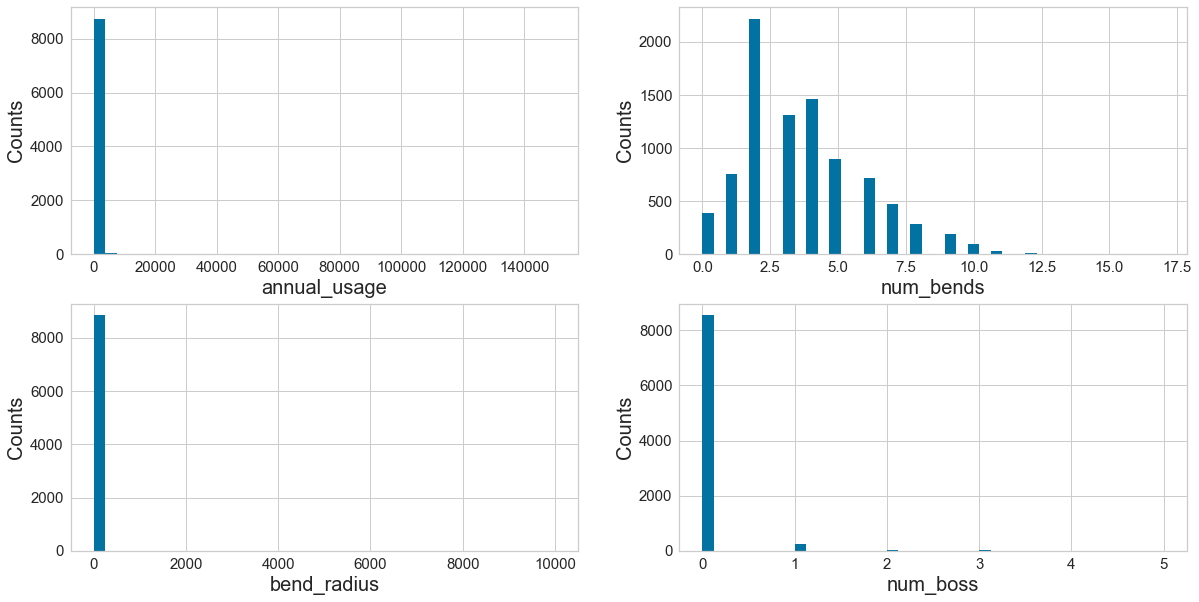

In [14]:
#Histograms 2

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['annual_usage', 'num_bends', 'bend_radius', 'num_boss']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'end_a_1x')

Text(0, 0.5, 'Counts')

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'end_a_2x')

Text(0, 0.5, 'Counts')

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'end_x_1x')

Text(0, 0.5, 'Counts')

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'usage_group')

Text(0, 0.5, 'Counts')

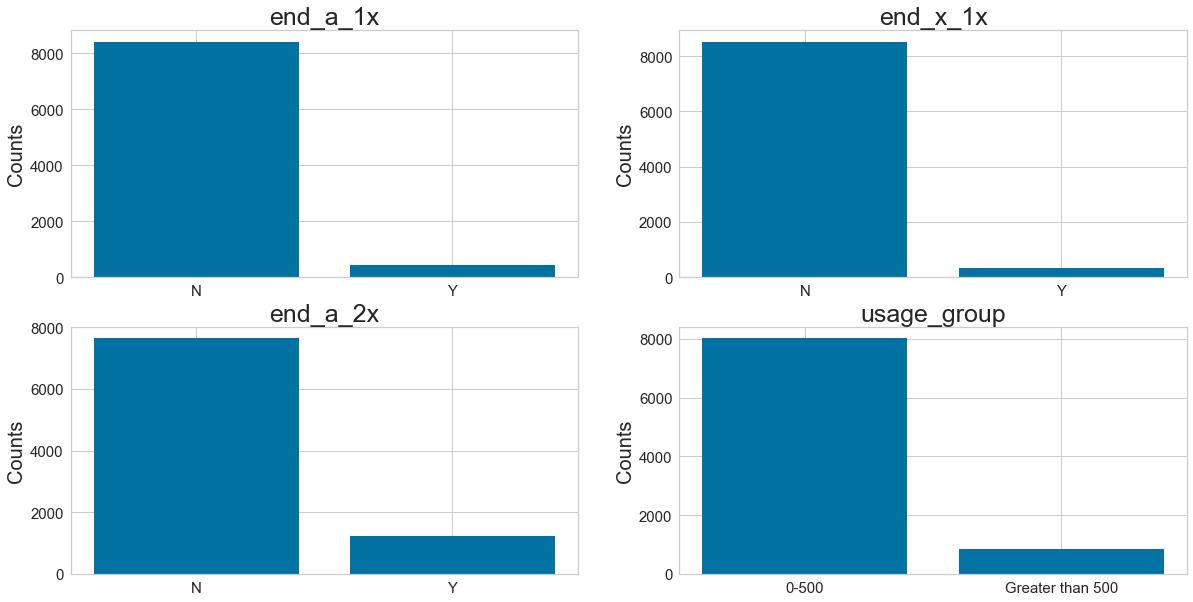

In [15]:
#7:  Barcharts: set up the figure size

plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

#Bar Graph for end_a_1x
# make the data read to feed into the visulizer
X_end_a_1x= data.replace({'end_a_1x': {1: 'Y', 0: 'N'}}).groupby('end_a_1x').size().reset_index(name='Counts')['end_a_1x']
Y_end_a_1x = data.replace({'end_a_1x': {1: 'Y', 0: 'N'}}).groupby('end_a_1x').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_end_a_1x, Y_end_a_1x)
axes[0, 0].set_title('end_a_1x', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

#Bar Graph for end_a_2x
# make the data read to feed into the visulizer
X_end_a_2x= data.replace({'end_a_2x': {1: 'Y', 0: 'N'}}).groupby('end_a_2x').size().reset_index(name='Counts')['end_a_2x']
Y_end_a_2x = data.replace({'end_a_2x': {1: 'Y', 0: 'N'}}).groupby('end_a_2x').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_end_a_2x, Y_end_a_2x)
axes[1, 0].set_title('end_a_2x', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

#Bar Graph for end_x_1x
# make the data read to feed into the visulizer
X_end_x_1x= data.replace({'end_x_1x': {1: 'Y', 0: 'N'}}).groupby('end_x_1x').size().reset_index(name='Counts')['end_x_1x']
Y_end_x_1x = data.replace({'end_x_1x': {1: 'Y', 0: 'N'}}).groupby('end_x_1x').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_end_x_1x, Y_end_x_1x)
axes[0, 1].set_title('end_x_1x', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

#Bar Graph for Usage Group
# make the data read to feed into the visulizer
X_UGroup = data.replace({'usage_group': {1: '0-500', 2: '2500-1000', 3: '1000-5000', 4: 'Greater than 10,000'}}).groupby('usage_group').size().reset_index(name='Counts')['usage_group']
Y_UGroup = data.replace({'usage_group': {1: '0-500', 2: '2500-1000', 3: '1000-5000', 4: 'Greater than 10,000'}}).groupby('usage_group').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_UGroup, Y_UGroup)
axes[1, 1].set_title('usage_group', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)



Rank2D(algorithm=None,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D7216DE88>,
       colormap='RdBu_r',
       features=['annual_usage', 'num_bends', 'bend_radius', 'num_boss'],
       show_feature_names=None)

array([[  0.  ,   8.  ,  19.05,   0.  ],
       [  0.  ,   9.  ,  19.05,   0.  ],
       [  0.  ,   4.  ,  50.8 ,   0.  ],
       ...,
       [  1.  ,   2.  ,  38.1 ,   0.  ],
       [422.  ,   2.  ,  50.8 ,   0.  ],
       [  3.  ,   1.  ,  50.8 ,   0.  ]])

C:\Users\nesti\Anaconda3\lib\site-packages\yellowbrick\features\rankd.py:216: YellowbrickWarning: RankD plots may be clipped when using matplotlib v3.1.1, upgrade to matplotlib v3.1.2 or later to fix the plots.
  warnings.warn(msg, YellowbrickWarning)


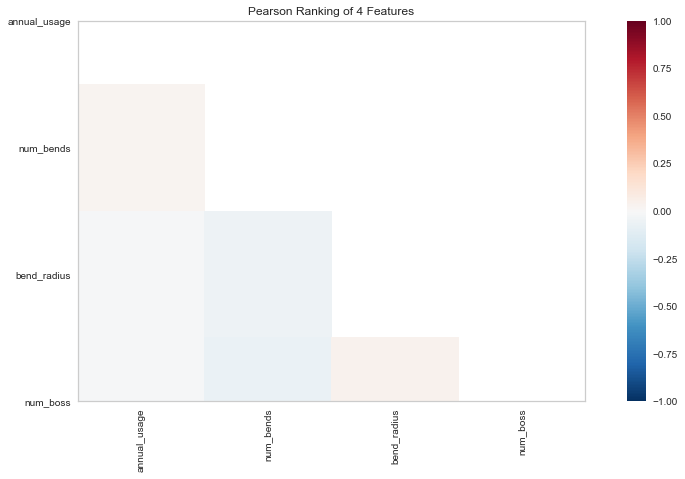

In [16]:
#Step 8: Pearson Ranking

#set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = data[num_features].values


# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="pcoords1.png") # Draw/show/poof the data

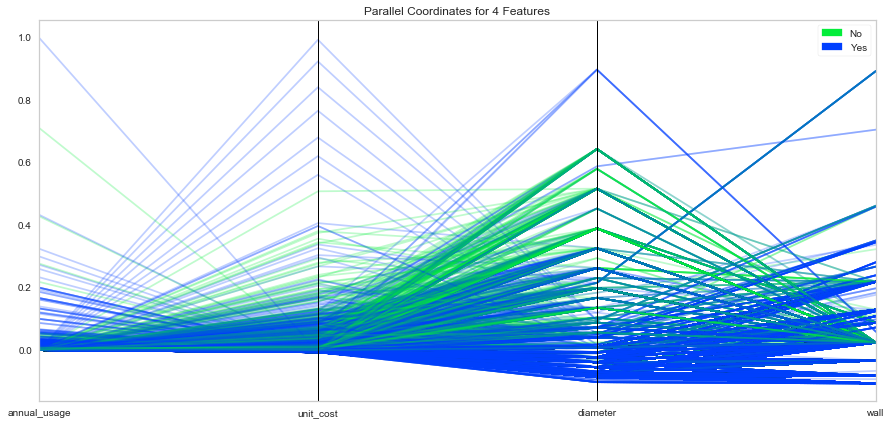

In [17]:
# Step 9:  Compare variables against end_a_2x Yes and No

#set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target
classes = ['Yes', 'No']
num_features = ['annual_usage', 'unit_cost', 'diameter', 'wall']

# copy data to a new dataframe
data_norm = data.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = data.end_a_2x.values

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof(outpath="pcoords2.png") # Draw/show/poof the data
plt.show();

In [38]:
#Step 11: Fill in Missing Values and Eliminate Features
#Find Columns with missing values
print("Describe Data")
print(data.describe())

#Summarize data
print("Summarized Data")
print(data.describe(include=['O']))

#Show data
data

#The only missing data is in Material ID. The material IDs are somewhat grouped together 
#so I think the most effective way to fill in the NA's is with a front fill. 

# replacing na values in material_id with front fille
data["material_id"].fillna( method ='ffill', inplace = True) 

#Summarize data
print("Summarized Data")
print(data.describe(include=['O']))

Describe Data
        annual_usage    unit_cost     diameter         wall       length  \
count    8855.000000  8855.000000  8855.000000  8855.000000  8855.000000   
mean      344.010277     9.209328    24.135999     1.494903    95.064623   
std      2877.190492    33.653820    27.066502     0.652347    63.055304   
min         0.000000     0.002916     3.180000     0.710000     0.000000   
25%         0.000000     0.362196     9.520000     0.890000    47.000000   
50%         5.000000     1.425805    15.880000     1.650000    83.000000   
75%        85.000000     6.841083    25.400000     1.650000   129.000000   
max    150000.000000  1000.000000   203.200000     7.900000  1333.000000   

         num_bends  bend_radius     num_boss  num_bracket        other  
count  8855.000000  8855.000000  8855.000000  8855.000000  8855.000000  
mean      3.697685    48.455189     0.045285     0.006776     0.026200  
std       2.300787   186.660380     0.260067     0.095997     0.230379  
min      

,tube_assembly_id,annual_usage,unit_cost,usage_group,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,TA-00002,0,0.305220,0-500,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0
1,TA-00004,0,0.309894,0-500,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,TA-00005,0,0.463435,0-500,SP-0029,19.05,1.24,109.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0
3,TA-00012,0,0.340997,0-500,SP-0039,6.35,0.71,207.0,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,TA-00013,50,10.004284,0-500,SP-0028,38.10,1.65,106.0,3,76.20,N,N,N,N,NONE,NONE,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8850,TA-21190,869,0.079270,500-1000,SP-0035,15.88,1.65,77.0,5,31.75,N,N,N,N,EF-003,EF-018,0,0,0
8851,TA-21191,752,6.131658,500-1000,SP-0035,15.88,1.65,97.0,6,31.75,N,N,N,N,EF-003,EF-018,0,0,0
8852,TA-21195,1,0.063327,0-500,SP-0029,25.40,1.65,86.0,2,38.10,N,N,N,N,EF-003,EF-009,0,0,0
8853,TA-21196,422,18.214141,0-500,SP-0029,34.92,1.65,49.0,2,50.80,Y,Y,N,N,EF-003,EF-017,0,0,0


Summarized Data
       tube_assembly_id usage_group material_id end_a_1x end_a_2x end_x_1x  \
count              8855        8855        8855     8855     8855     8855   
unique             8855           5          17        2        2        2   
top            TA-14026       0-500     SP-0029        N        N        N   
freq                  1        8009        4675     8407     7636     8509   

       end_x_2x   end_a   end_x  
count      8855    8855    8855  
unique        2      25      24  
top           N  EF-003  EF-003  
freq       7759    4612    4398  


In [39]:
#Drop Unnecessary Columns

df1 = data.drop(['other', 'tube_assembly_id'], axis=1)
df1

,annual_usage,unit_cost,usage_group,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket
0,0,0.305220,0-500,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0
1,0,0.309894,0-500,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0
2,0,0.463435,0-500,SP-0029,19.05,1.24,109.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0
3,0,0.340997,0-500,SP-0039,6.35,0.71,207.0,7,19.05,N,N,N,N,EF-008,EF-008,0,0
4,50,10.004284,0-500,SP-0028,38.10,1.65,106.0,3,76.20,N,N,N,N,NONE,NONE,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8850,869,0.079270,500-1000,SP-0035,15.88,1.65,77.0,5,31.75,N,N,N,N,EF-003,EF-018,0,0
8851,752,6.131658,500-1000,SP-0035,15.88,1.65,97.0,6,31.75,N,N,N,N,EF-003,EF-018,0,0
8852,1,0.063327,0-500,SP-0029,25.40,1.65,86.0,2,38.10,N,N,N,N,EF-003,EF-009,0,0
8853,422,18.214141,0-500,SP-0029,34.92,1.65,49.0,2,50.80,Y,Y,N,N,EF-003,EF-017,0,0


Describe Data
        annual_usage    unit_cost     diameter         wall      length  \
count    8852.000000  8852.000000  8852.000000  8852.000000  8852.00000   
mean      344.102463     9.211864    24.132340     1.494251    95.07775   
std      2877.673094    33.659231    27.066526     0.648839    63.06048   
min         0.000000     0.002916     3.180000     0.710000     0.00000   
25%         0.000000     0.362280     9.520000     0.890000    47.00000   
50%         5.000000     1.426028    15.880000     1.650000    83.00000   
75%        85.000000     6.843865    25.400000     1.650000   129.00000   
max    150000.000000  1000.000000   203.200000     7.900000  1333.00000   

         num_bends  bend_radius    num_boss  num_bracket  
count  8852.000000  8852.000000  8852.00000  8852.000000  
mean      3.698147    45.082885     0.04530     0.006778  
std       2.301023    35.811739     0.26011     0.096013  
min       0.000000     0.000000     0.00000     0.000000  
25%       2.000

(array([8.839e+03, 1.100e+01, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([   0.   ,  249.975,  499.95 ,  749.925,  999.9  , 1249.875,
        1499.85 , 1749.825, 1999.8  , 2249.775, 2499.75 , 2749.725,
        2999.7  , 3249.675, 3499.65 , 3749.625, 3999.6  , 4249.575,
        4499.55 , 4749.525, 4999.5  , 5249.475, 5499.45 , 5749.425,
        5999.4  , 6249.375, 6499.35 , 6749.325, 6999.3  , 7249.275,
        7499.25 , 7749.225, 7999.2  , 8249.175, 8499.15 , 8749.125,
        8999.1  , 9249.075, 9499.05 , 9749.025, 9999.   ]),
 <a list of 40 Patch objects>)

Text(0.5, 0, 'bend_radius')

Text(0, 0.5, 'Counts')

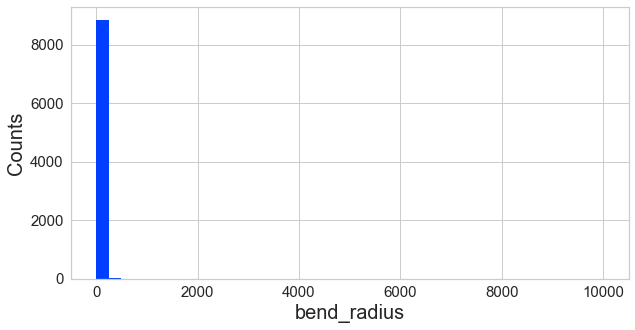

In [40]:
#Delete Outlier Rows

# delete all rows with column 'bend_radius' has value less than 1000
indexNames = df1[(df1['bend_radius'] > 9000)].index
df1.drop(indexNames , inplace=True)

print("Describe Data")
print(df1.describe())

plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['bend_radius'], bins=40)
plt.xlabel('bend_radius', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)


(array([  6.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   4.,   3.,   4.,
          6.,  23.,  29.,  52., 135., 184., 213., 333., 421., 452., 605.,
        702., 781., 794., 992., 821., 808., 613., 523., 239.,  70.,  19.,
         10.,   6.,   1.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.17989843, 0.35979686, 0.53969529, 0.71959372,
        0.89949215, 1.07939058, 1.25928901, 1.43918745, 1.61908588,
        1.79898431, 1.97888274, 2.15878117, 2.3386796 , 2.51857803,
        2.69847646, 2.87837489, 3.05827332, 3.23817175, 3.41807018,
        3.59796861, 3.77786704, 3.95776547, 4.13766391, 4.31756234,
        4.49746077, 4.6773592 , 4.85725763, 5.03715606, 5.21705449,
        5.39695292, 5.57685135, 5.75674978, 5.93664821, 6.11654664,
        6.29644507, 6.4763435 , 6.65624193, 6.83614037, 7.0160388 ,
        7.19593723]),
 <a list of 40 Patch objects>)

Text(0.5, 0, 'length_log1p')

Text(0, 0.5, 'Counts')

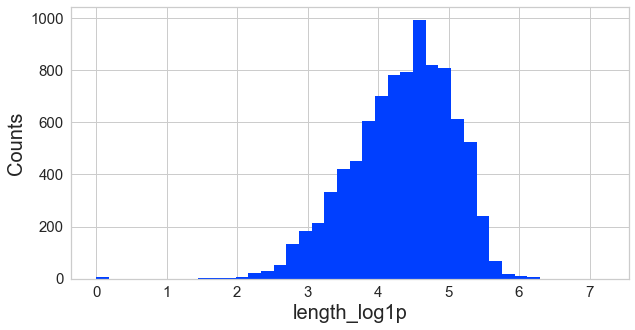

In [41]:
#Step 12: Use Log Transformation on Length

# import package
import numpy as np

# log-transformation on Length
def log_transformation(df1):
    return df1.apply(np.log1p)

df1['length_log1p'] = log_transformation(df1['length'])

# check the data
#print(data.describe())

#check the distribution using histogram
# set up the figure size
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(df1['length_log1p'], bins=40)
plt.xlabel('length_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()


(array([3.870e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.390e+02, 1.000e+00,
        5.000e+00, 2.058e+03, 6.650e+02, 5.000e+00, 8.110e+02, 1.622e+03,
        1.000e+00, 1.346e+03, 4.710e+02, 2.170e+02, 7.500e+01, 4.820e+02,
        2.250e+02, 4.600e+01, 2.420e+02, 4.000e+01, 1.000e+00, 1.100e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0.        , 0.15686905, 0.3137381 , 0.47060715, 0.6274762 ,
        0.78434525, 0.9412143 , 1.09808335, 1.2549524 , 1.41182145,
        1.56869051, 1.72555956, 1.88242861, 2.03929766, 2.19616671,
        2.35303576, 2.50990481, 2.66677386, 2.82364291, 2.98051196,
        3.13738101, 3.29425006, 3.45111911, 3.60798816, 3.76485721,
        3.92172626, 4.07859531, 4.23546436, 4.39233341, 4.54920247,
        4.70607152, 4.86294057, 5.01980962, 5.17667867, 5.33354772,
        5.49041677, 5.6472

Text(0.5, 0, 'bend_radius_log1p')

Text(0, 0.5, 'Counts')

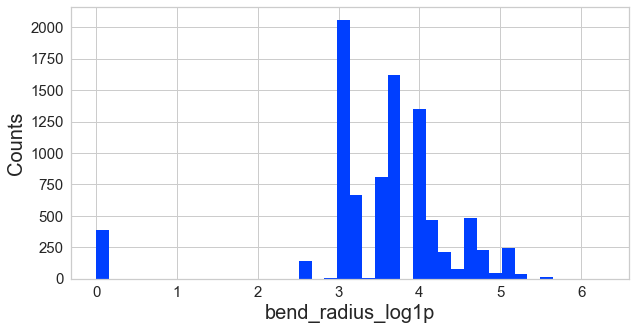

In [42]:
# log-transformation on bend radius

df1['bend_radius_log1p'] = log_transformation(df1['bend_radius'])

# check the data
#print(data.describe())

#check the distribution using histogram
# set up the figure size

plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(df1['bend_radius_log1p'], bins=40)
plt.xlabel('bend_radius_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
#plt.show()


In [43]:
#Step 13 - convert categorical data to numbers
#Summarize data
print("Summarized Data")
print(df1.describe(include=['O']))


Summarized Data
       usage_group material_id end_a_1x end_a_2x end_x_1x end_x_2x   end_a  \
count         8852        8852     8852     8852     8852     8852    8852   
unique           5          17        2        2        2        2      25   
top          0-500     SP-0029        N        N        N        N  EF-003   
freq          8006        4674     8404     7634     8506     7756    4611   

         end_x  
count     8852  
unique      24  
top     EF-003  
freq      4397  


In [44]:
#get the categorical data
cat_features = ['end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x']
df1_cat = df1[cat_features]
# One Hot Encoding 
df1_cat_dummies = pd.get_dummies(df1_cat)
# check the data
print(df1_cat_dummies.head(8))

   end_a_1x_N  end_a_1x_Y  end_a_2x_N  end_a_2x_Y  end_x_1x_N  end_x_1x_Y  \
0           1           0           1           0           1           0   
1           1           0           1           0           1           0   
2           1           0           1           0           1           0   
3           1           0           1           0           1           0   
4           1           0           1           0           1           0   
5           1           0           1           0           1           0   
6           1           0           1           0           1           0   
7           1           0           1           0           1           0   

   end_x_2x_N  end_x_2x_Y  
0           1           0  
1           1           0  
2           1           0  
3           1           0  
4           1           0  
5           1           0  
6           1           0  
7           1           0  


In [46]:
#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['unit_cost', 'bend_radius_log1p', 'length_log1p', 'diameter']
data_model_X = pd.concat([df1[features_model], df1_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = df1.replace({'usage_group': {1: '0-500', 2: '500-1000', 3: '1000-5000', 4: '5000-10000', 5: 'Greater than 10,000'}})['usage_group']
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

data_model_X.shape

data_model_y.shape

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of usage group 0-500 and usuage group greater than 500 in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of usage group 0-500 and usuage group greater than 500 in the validation set:')
print(y_val.value_counts())

(8852, 12)

(8852,)

No. of samples in training set:  6196
No. of samples in validation set: 2656


No. of usage group 0-500 and usuage group greater than 500 in the training set:
0-500                  5597
500-1000                298
1000-5000               249
Greater than 10,000      31
5000-10000               21
Name: usage_group, dtype: int64


No. of usage group 0-500 and usuage group greater than 500 in the validation set:
0-500                  2409
1000-5000               106
500-1000                103
5000-10000               26
Greater than 10,000      12
Name: usage_group, dtype: int64


C:\Users\nesti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nesti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D7ECDF888>,
                classes=['0-500', '500-1000', '1000-5000', '5000-10000',
                         'Greater than 10,000'],
                cmap=<matplotlib.colors.ListedColormap object at 0x0000016D7F0ECCC8>,
                encoder=None, fontsize=None, force_model=False,
                is_fitted='auto', model=None, percent=False,
                sample_weight=None)

0.9070030120481928

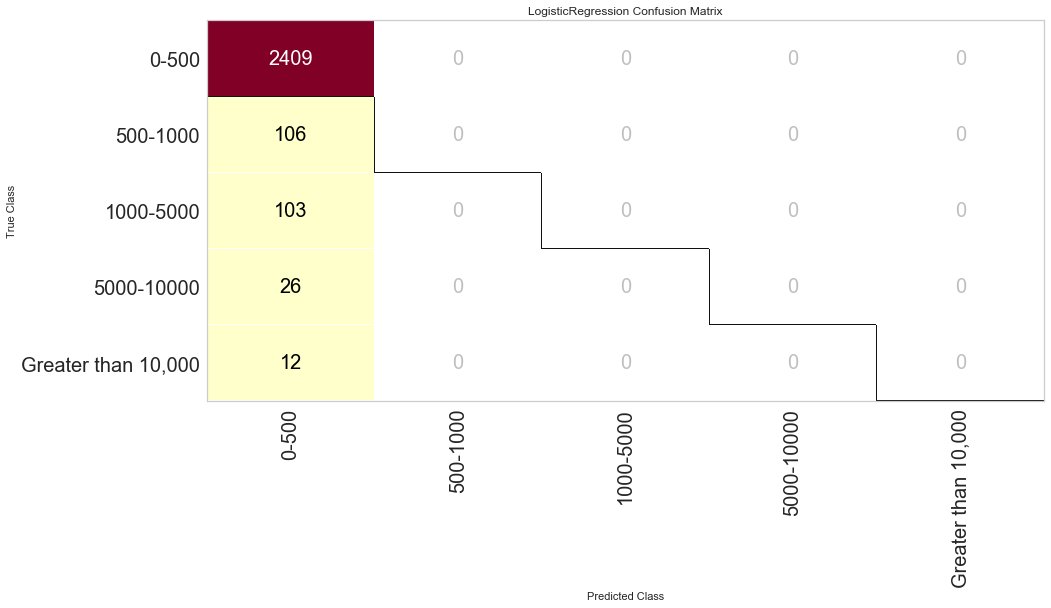

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D7ED00808>,
                     classes=['0-500', '500-1000', '1000-5000', '5000-10000',
                              'Greater than 10,000'],
                     cmap=<matplotlib.colors.ListedColormap object at 0x0000016D7F175288>,
                     encoder=None, force_model=False, is_fitted='auto',
                     model=None, support=None)

C:\Users\nesti\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9070030120481928

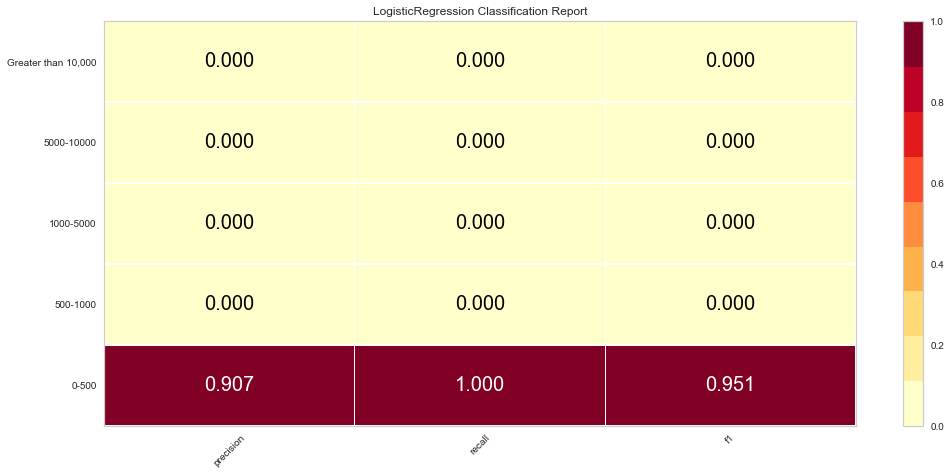

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D7EC8E448>,
       classes=None, encoder=None, force_model=False, is_fitted='auto',
       macro=True, micro=True, model=None, per_class=True)

0.6330491105970644

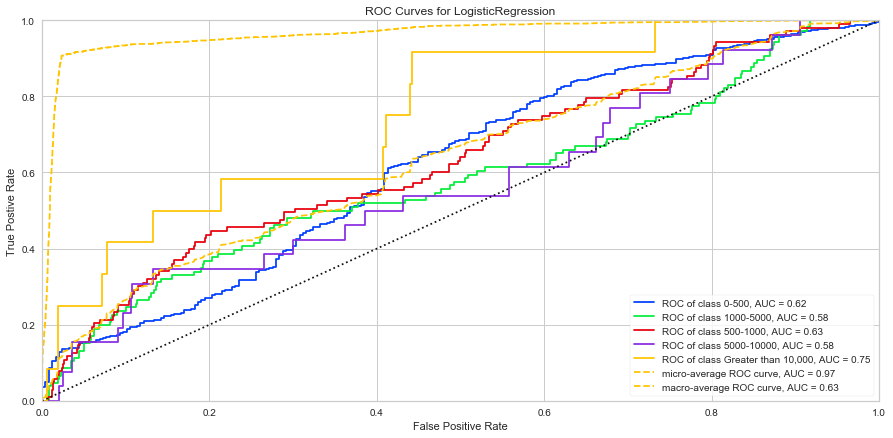

In [51]:
# Step 15 - Evaluation Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['0-500','500-1000','1000-5000','5000-10000','Greater than 10,000']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()